In [84]:
import json
import datetime
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def collected(jsonFile):

    entries = json.load(open(jsonFile))["data"]
    entries.sort(key=lambda w:w['date'])
    r = [ {
        "dataDate": t['date'],
        "cases": t['cases'],
        "deaths": t['deaths'],
        "tests": t['tests'],
        } for t in entries]
    r.sort( key=lambda x:x['dataDate'])

    windows = [
        {'date': r[i]['dataDate'],
         'cases': max(r[i]['cases']-r[i-7]['cases'],0),
         'tests': max(r[i]['tests']-r[i-7]['tests'],0),
         'ctests' : r[i]['tests'],
         'deaths': r[i]['deaths'],
         'slice': r[i-7:i]
         }
        for i in range(7,len(r))
        ]

    windows = [{
        'date' : w['date'],
        'cases' : w['cases'],
        'tests' : w['tests'],
        'deaths' : w['deaths'],
        'ctests' : w['ctests'],
        'pos' : w['cases']/w['tests'] if (w['tests']) else 0,
        'slice': w['slice']
        }
        for w in windows
        ]
    windows = [
        {
            'date' : w['date'],
            'cases' : w['cases'],
            'pos': w['pos'],
            'deaths' : w['deaths'],
            'tests' : w['tests'],
            'ctests' : w['ctests'],
            'estimate' : 28*w['cases']*math.sqrt(max(w['pos'],0)),
            'slice': w['slice']
        }
        for w in windows
                                                 
        ]
    windows = [
        {
        'date': w['date'],
        'pos': w['pos'],
            'cases': w['cases'],
            'tests' : w['tests'],
            'deaths' : w['deaths'],
            'ctests' : w['ctests'],
        'estimate': w['estimate'],
            'slice': w['slice']
        }
        for w in windows
        ]
    return windows


In [85]:
data=collected('../downloads/2020_08_25/mckinley.json')
import pprint
pprint.pprint([w for w in data if w['pos']==0])

[{'cases': 167,
  'ctests': 24680,
  'date': '2020-07-06',
  'deaths': 179,
  'estimate': 0.0,
  'pos': 0,
  'slice': [{'cases': 3347,
             'dataDate': '2020-06-29',
             'deaths': 166,
             'tests': 27014},
            {'cases': 3375,
             'dataDate': '2020-06-30',
             'deaths': 168,
             'tests': 27014},
            {'cases': 3395,
             'dataDate': '2020-07-01',
             'deaths': 170,
             'tests': 27014},
            {'cases': 3408,
             'dataDate': '2020-07-02',
             'deaths': 172,
             'tests': 27014},
            {'cases': 3450,
             'dataDate': '2020-07-03',
             'deaths': 177,
             'tests': 27014},
            {'cases': 3483,
             'dataDate': '2020-07-04',
             'deaths': 179,
             'tests': 24285},
            {'cases': 3502,
             'dataDate': '2020-07-05',
             'deaths': 179,
             'tests': 24325}],
  'tests': 0},
 {

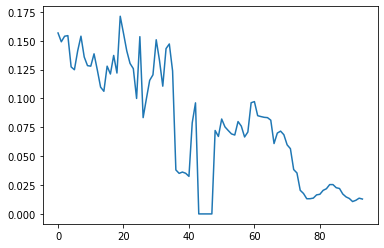

In [59]:

plt.plot([w['pos'] for w in data])

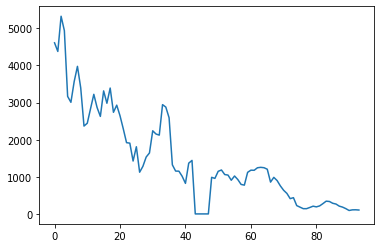

In [53]:
plt.plot([w['estimate'] for w in data])

In [9]:
total = sum(l['estimate'] for l in data)/10

In [10]:
print(total)

5496.7063489950715
